In [1]:
# Importing standard data manipulation libraries
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',100)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
import pickle

C:\Users\ccurrent\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


In [2]:
# Importing ML libraries
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import Imputer, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import  r2_score,mean_absolute_error,mean_squared_error,confusion_matrix, accuracy_score

C:\Users\ccurrent\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [6]:
df = pd.read_csv('train.csv',index_col='Id')
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
def count_plotting():
    category_types = list(df.select_dtypes(include=['object']))
    for item in category_types:
        plt.figure(figsize=(5,5))
        sns.countplot(y=item,data=df)
        plt.show()
# count_plotting()
# Drop Street,Utilities,Condition1, Condition2,RoofMatl,Heating,Functional,GarageQual,GarageCond,Landslope,Functional
# Modify LotConfig,RoofStyle,MasVnrType,Exterior1st,Exterior2nd,ExterCond,Foundation,BsmtCond,BsmtFinType2,HeatingQC,Electrical,SalesType,SalesCondition

### We can see for the exploratory data from the countplots that we have several categorical columns that need drop due to irrelevant data (all one item) and we also need to group together similar count items to elimate skewing of the data.

In [5]:
# Clean up catergorical columns for encoding
def category_cleaning():
    total_null_count=0
    
    """ Droping unnecessary columns """
    df.drop(columns=['Street','Utilities','Condition1','Condition2','RoofMatl','Heating','Functional','GarageQual','GarageCond','LandSlope','Functional'],inplace=True)
   
    """ Group all similar count items """
    df['RoofStyle'].replace(['Gambrel','Mansard','Flat','Shed'],'Other',inplace=True)
    df['MasVnrType'].replace('BrkCmn','Stone',inplace=True)
    df['Exterior1st'].replace(['BrkComm','AsphShn','Stone','ImStucc','CBlock'],'Other',inplace=True)
    df['Exterior2nd'].replace(['Brk Cmn','ImStucc','AsphShn','Stone','Other','CBlock'],'Other',inplace=True)
    df['Foundation'].replace(['Wood','Slab','Stone'],'Slab',inplace=True)
    df['BsmtFinType2'].replace(['BLQ','ALQ','Rec','LwQ','GLQ'],'Other',inplace=True)
    df['Electrical'].replace(['FuseP','Mix'],'FuseF',inplace=True)
    df['SaleCondition'].replace(['AdjLand','Alloca','Family'],'Other',inplace=True)
    df['LotConfig'].replace('FR#','FR2',inplace=True)
    df['ExterCond'].replace(['Po','Ex'],'Fa',inplace=True)
    df['BsmtCond'].replace('Po','Fa',inplace=True)
    df['HeatingQC'].replace('Po''Fa',inplace=True)
    df['SaleType'].replace(['ConLI','CWD','ConLw','Con','Oth'],'ConLD',inplace=True)
    
    """ Fillinf in any missing data"""
    category_types = list(df.select_dtypes(include=['object']))
    for item in category_types:
        df[item].fillna('Missing',inplace=True)
        total_null_count += df[item].isnull().sum()
    print(f'Total null count for all categorical items is ',total_null_count)
category_cleaning()
# count_plotting()

Total null count for all categorical items is  0


In [72]:
corr = df.corr()
high_corr = len(df[corr>95])
print(high_corr)

1460


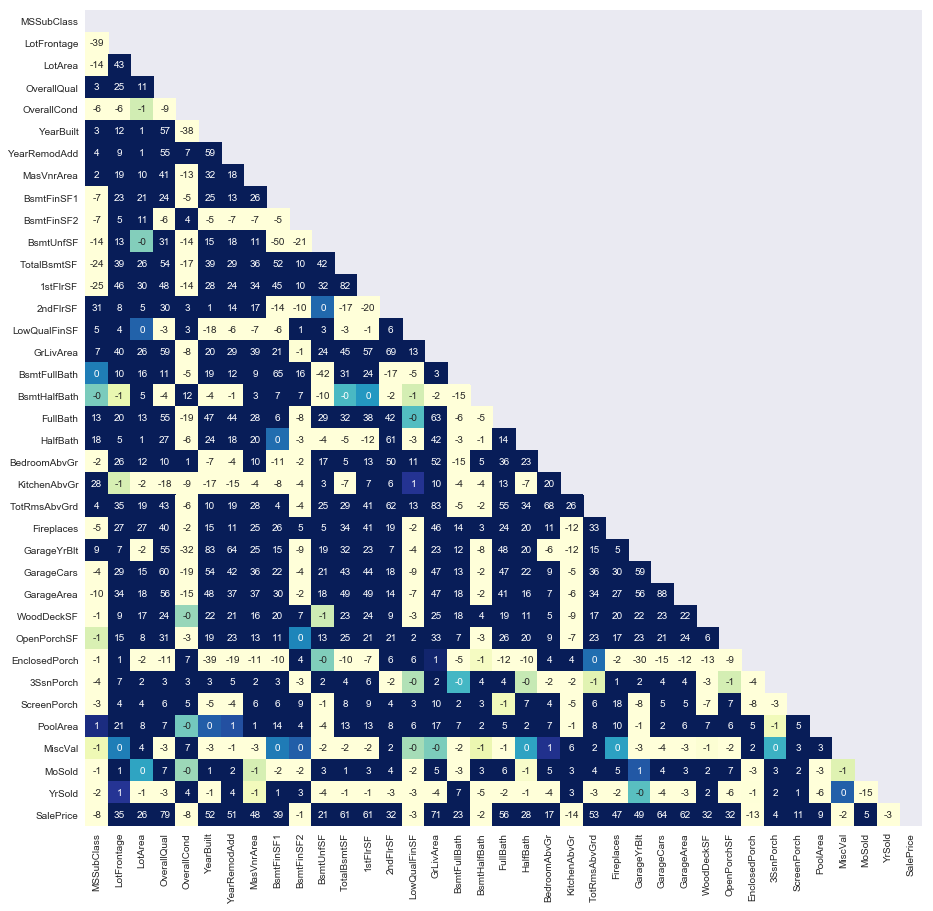

In [63]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(15,15))

sns.heatmap(corr*100,vmin=-1,vmax=1,annot=True, fmt='.0f',cmap="YlGnBu",mask=mask,cbar=False)

plt.show()

### Taking a look at the numerical categories

In [6]:
category_types = list(df.select_dtypes(exclude=['object']))
print(category_types)
df.select_dtypes(exclude=['object']).isnull().sum()

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

### What we can see is that Lot Frontage and GarageYrBuilt are the only columns that have Nan values.  We need to test to see if an Imputer is appropiate here or if fillna(0,inplace=True) is more applicable



In [7]:
class impute_or_not:
    
    def __init__(self,df):
        self.df = df
        
    def zero_fill(self):
        numerical = self.df.select_dtypes(exclude=['object'])
        for n in numerical:
            self.df[n].fillna(0,inplace=True)
        return self.df
    
    def impute_fill(self):
        pass

class run_class(impute_or_not):
    
    def __init__(self,df,num=0):
        self.df = df
        self.num = num
        
    def fill_nums(self):
        if self.num == 0:
            self.df.fillna(0,inplace=True)
            print('Null value : {}'.format(sum(self.df.isnull().sum())))
        else:
            pass

    def dummies(self):
        self.df = pd.get_dummies(self.df)
    
    def add_features(self):
        self.df['Year_Range'] = self.df['YrSold'] - self.df['YearBuilt'] 
    
    def look_head(self):
        return self.df.head()
    
rc = run_class(df,0)
rc.fill_nums()
rc.dummies()
rc.add_features()
rc.look_head()

Null value : 0


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_Grvl,Alley_Missing,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,...,Electrical_FuseF,Electrical_Missing,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Missing,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_Missing,GarageFinish_Fin,GarageFinish_Missing,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,PoolQC_Missing,Fence_GdPrv,Fence_GdWo,Fence_Missing,Fence_MnPrv,Fence_MnWw,MiscFeature_Gar2,MiscFeature_Missing,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_ConLD,SaleType_New,SaleType_WD,SaleCondition_Abnorml,SaleCondition_Normal,SaleCondition_Other,SaleCondition_Partial,Year_Range
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500,0,0,0,1,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,5
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500,0,0,0,1,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,31
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500,0,0,0,1,0,0,1,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,7
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000,0,0,0,1,0,0,1,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,91
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000,0,0,0,1,0,0,1,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,8


In [8]:
# features 
X = rc.df.drop(['SalePrice','MSSubClass','WoodDeckSF','EnclosedPorch','ScreenPorch','PoolArea',],axis=1)
# target
y = rc.df.SalePrice

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.1,
                                                   train_size=0.9,
                                                   random_state=123,
                                                   shuffle=False
                                                   )
print(len(X_train),len(X_test),len(y_train),len(y_test))

1314 146 1314 146


In [9]:
pipelines = {
             'dt': make_pipeline(StandardScaler(),DecisionTreeRegressor(random_state=123)),
             'rf': make_pipeline(StandardScaler(),RandomForestRegressor(random_state=123)),
             'gb': make_pipeline(StandardScaler(),GradientBoostingRegressor(random_state=123)),
             'ada': make_pipeline(StandardScaler(),AdaBoostRegressor(random_state=123)),
            }


In [18]:
dt_hyperparametes = {
    'decisiontreeregressor__max_depth' : [1,2,3,4,5],
    'decisiontreeregressor__min_samples_leaf' : [1,2,3,4,5]
}
    
rf_hyperparameters = {
    'randomforestregressor__n_estimators' : [1,2,3,4],
    'randomforestregressor__max_features' : ['auto','sqrt',0.33]
}
gb_hyperparameters = {
    'gradientboostingregressor__n_estimators' : [100,200,300],
    'gradientboostingregressor__learning_rate' : [0.05,0.1,0.2],
    'gradientboostingregressor__max_depth': [1,2,3]
}
ada_hyperparameters = {
    'adaboostregressor__n_estimators' : [50,75,100],
    'adaboostregressor__learning_rate' : [0.05,0.1,0.2],
    'adaboostregressor__loss' : ['linear','square']
}
# Create hyperparameters dictionary
hyperparameters = {
    'dt' : dt_hyperparametes,
    'rf' : rf_hyperparameters,
    'gb' : gb_hyperparameters,
    'ada' : ada_hyperparameters,
}
# GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor

In [19]:
# pipelines['gb'].get_params()

In [20]:
# Create empty dictionary called fitted_models
fitted_models = {}

# Loop through model pipelines, tuning each one and saving it to fitted_models
for name, pipeline in pipelines.items():
    model = RandomizedSearchCV(pipeline, hyperparameters[name], cv=10, n_jobs=-1)
    
    # Fit model on X_train, y_train
    model.fit(X_train, y_train)
    
    # Store model in fitted_models[name] 
    fitted_models[name] = model
    
    # Print '{name} has been fitted'
    print(name, 'has been fitted.')

dt has been fitted.
rf has been fitted.
gb has been fitted.
ada has been fitted.


In [21]:
from sklearn.exceptions import NotFittedError

for name, model in fitted_models.items():
    try:
        pred = model.predict(X_test)
        print(name, 'has been fitted.')
    except NotFittedError as e:
        print(repr(e))

dt has been fitted.
rf has been fitted.
gb has been fitted.
ada has been fitted.


In [22]:
for name, model in fitted_models.items():
    print( name, model.best_score_ )

dt 0.7263810862834728
rf 0.8218417923078564
gb 0.892092351358738
ada 0.7905483161837746


In [23]:
fitted_models['gb'].best_estimator_

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('gradientboostingregressor', GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, mi...rs=200, presort='auto', random_state=123,
             subsample=1.0, verbose=0, warm_start=False))])

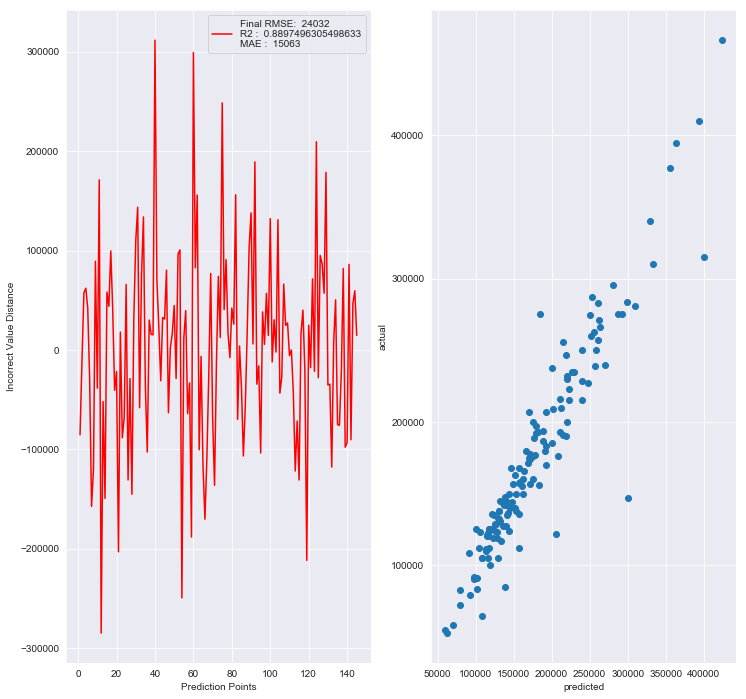

In [24]:
best_est = fitted_models['gb'].best_estimator_
final_prediction = best_est.predict(X_test)
final_mse = mean_squared_error(y_test,final_prediction)
final_rmse = np.sqrt(final_mse)
final_rmse
plt.figure(figsize=(12,12))
plt.subplot(1,2,1)
plt.plot(fitted_models['gb'].best_estimator_.predict(X_test)[:145]-df['SalePrice'][:145],c='r',linewidth=1.5)
plt.xlabel('Prediction Points')
plt.ylabel('Incorrect Value Distance')
plt.legend(['Final RMSE:  {:.0f}\nR2 :  {}\nMAE :  {:.0f}'.format(final_rmse,r2_score(y_test,best_est.predict(X_test)),mean_absolute_error(y_test,best_est.predict(X_test)))],loc=0,fontsize='medium')
plt.subplot(1,2,2)
rf_pred = fitted_models['gb'].predict(X_test)
plt.scatter(rf_pred, y_test)
plt.plot()
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

## My Final conclusion that I have drawn is that this dataset lacks suffiecent columns i.e. total bedrooms and the best model I could create was only an 89% accuracy score

In [61]:
z = list(zip(final_prediction[:20],y_test[:20]))
dataz = pd.DataFrame(columns=['predictions','actual values'],data=z)
dataz

,predictions,actual values
0,123093.090376,119000
1,169778.034484,206900
2,280778.233805,295493
3,202044.138071,208900
4,292389.596809,275000
5,113736.382182,111000
6,149552.404938,156500
7,79643.500770,72500
8,219155.984317,190000
9,79530.203594,82500
